## Importing Necessary Libraries

In [24]:
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

## Versions of all packages used

In [21]:
print(np.__version__)
print(scipy.__version__)
print(matplotlib.__version__)
print(pd.__version__)

1.18.4
1.6.3
3.2.1
1.0.3


#### Example 2.3.1 (Industrial revenue) Consider a random sample of 110 small to mid-size companies located in the midwestern region of the United States, and classify them according to their annual revenues (in millions of dollars). Then construct a frequency distribution table for the data obtained by this classification

##### Assign given data to the variable data

In [22]:
data = [4,3,5,3,4,1,2,3,4,3,1,5,3,4,2,1,1,4,5,3,2,5,2,5,2,1,2,3,3,2,1,5,3,2,1,1,2,1,2,4,5,3,5,1,3,1,2,1,4,1,
4,5,4,1,1,2,4,1,4,1,2,4,3,4,1,4,1,4,1,2,1,5,3,1,5,2,1,2,3,1,2,2,1,1,2,1,5,3,2,5,5,2,5,3,5,2,3,2,3,5,2,3,5,5,2,
3,2,5,1,4]

##### To get frequencies

In [38]:
frequencies = Counter(data)
frequencies

Counter({4: 16, 3: 20, 5: 20, 1: 28, 2: 26})

In [58]:
frequency_df = pd.Series(frequencies).sort_index()  # make a series that is sorted by indices (which represent the numbers 1-5)
frequency_df = pd.DataFrame(frequency_df, columns=['Frequency'])  # transform the series into a dataframe/table so we can relabel columns
frequency_df

,Frequency
1,28
2,26
3,20
4,16
5,20


In [60]:
frequency_df['Cum.Frequency'] = np.cumsum(frequency_df['Frequency'])  # adding a cumulative frequency column 
frequency_df

,Frequency,Cum.Frequency
1,28,28
2,26,54
3,20,74
4,16,90
5,20,110


In [63]:
# adding a cumulative percentages column
frequency_df['Cum Percentage'] = frequency_df['Cum.Frequency'] * 100 / frequency_df['Frequency'].sum()
frequency_df

,Frequency,Cum.Frequency,Cum Percentage
1,28,28,25.454545
2,26,54,49.090909
3,20,74,67.272727
4,16,90,81.818182
5,20,110,100.000000


#### Example 2.3.4 (Rod manufacturing) The following data give the lengths (in millimeters) of 40 randomly selected rods manufactured by a company:

`
145 140 120 110 135 150 130 132 137 115
142 115 130 124 139 133 118 127 144 143
131 120 117 129 148 130 121 136 133 147
147 128 142 147 152 122 120 145 126 151
 `

#### Prepare a frequency distribution table for these data.

##### Assign given data to the variable RodData

In [95]:
RodData = [145,140,120,110,135,150,130,132,137,115,142,115,130,124,139,133,118,127,144,
143,131,120,117,129,148,130,121,136,133,147,147,128,142,147,152,122,120,145,126,151]

##### To define the intervals

In [96]:
breaks = pd.interval_range(start=110, end=152, periods=6, closed='left')  # period indicates how many intervals you want
breaks

IntervalIndex([[110, 117), [117, 124), [124, 131), [131, 138), [138, 145), [145, 152)],
              closed='left',
              dtype='interval[int64]')

##### To obtain the frequency of data in each class

In [118]:
rod_data = pd.DataFrame(data=RodData, columns=['Frequency'])
rod_data = rod_data.groupby(pd.cut(RodData, bins=breaks)).count()
rod_data

,Frequency
"[110, 117)",3
"[117, 124)",7
"[124, 131)",8
"[131, 138)",7
"[138, 145)",6
"[145, 152)",8


##### To combine necessary columns

In [120]:
rod_data['Percentage'] = 100 * rod_data['Frequency'] / rod_data['Frequency'].sum()
rod_data

,Frequency,Percentage
"[110, 117)",3,7.692308
"[117, 124)",7,17.948718
"[124, 131)",8,20.512821
"[131, 138)",7,17.948718
"[138, 145)",6,15.384615
"[145, 152)",8,20.512821


In [123]:
rod_data['Cum.Frequency'] = np.cumsum(rod_data['Frequency'])
rod_data

,Frequency,Percentage,Cum.Frequency
"[110, 117)",3,7.692308,3
"[117, 124)",7,17.948718,10
"[124, 131)",8,20.512821,18
"[131, 138)",7,17.948718,25
"[138, 145)",6,15.384615,31
"[145, 152)",8,20.512821,39


In [125]:
rod_data['Cum.Percentage'] = rod_data['Cum.Frequency'] * 100 / rod_data['Frequency'].sum()
rod_data

,Frequency,Percentage,Cum.Frequency,Cum.Percentage
"[110, 117)",3,7.692308,3,7.692308
"[117, 124)",7,17.948718,10,25.641026
"[124, 131)",8,20.512821,18,46.153846
"[131, 138)",7,17.948718,25,64.102564
"[138, 145)",6,15.384615,31,79.487179
"[145, 152)",8,20.512821,39,100.000000


#### Example 2.4.2 (Manufacturing defect types) In a manufacturing operation we are interested in understanding defect rates as a function of various process steps. The inspection points (categories) in the process are initial cutoff, turning, drilling, and assembly. The frequency distribution table for these data is shown in Table 2.4.1. Construct a pie chart for these data.

In [138]:
Freq = np.array([86, 182, 83, 10])
Percents = np.round(100 * Freq / Freq.sum(), 1)  # to calculate percentages

# labels that will go on the pie chart
labels = ['Initial cutoff', 'Turning', 'Drilling', 'Assembly']  # same order as Frequencies

##### Creating the Pie Chart

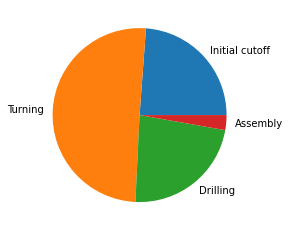

In [140]:
plt.pie(x=Freq, labels=labels)
plt.show()

#### Example 2.4.4 (Auto part defect types) A company that manufactures auto parts is interested in studying the types of defects in parts produced at a particular plant. The following data shows the types of defects that occurred over a certain period:

`
2 1 3 1 2 1 5 4 3 1 2 3 4 3 1 5 2 3 1 2 3 5 4 3 1
5 1 4 2 3 2 1 2 5 4 2 4 2 5 1 2 1 2 1 5 2 1 3 1 4
`
#### Construct a bar chart for the types of defects found in the auto parts.

In [145]:
DefectTypes = [2,1,3,1,2,1,5,4,3,1,2,3,4,3,1,5,2,3,1,2,3,5,4,3,1,5,1,4,2,3,2,1,2,5,4,2,4,2,5,
1,2,1,2,1,5,2,1,3,1,4]

Counter({2: 13, 1: 14, 3: 9, 5: 7, 4: 7})

In [151]:
# To obtain the frequencies
counts = Counter(DefectTypes)  # notice how the Defect Type is the 'key' while the Frequency is the corresponding 'value'
counts

Counter({2: 13, 1: 14, 3: 9, 5: 7, 4: 7})

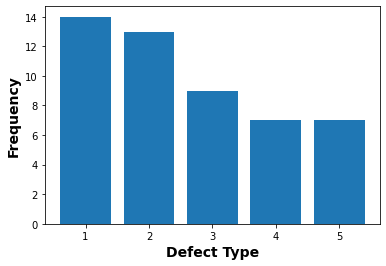

In [149]:
# To obtain the bar chart
plt.bar(x=counts.keys(), height=counts.values())
plt.xlabel("Defect Type", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.show()